# *Student Performance Indicator*

### *Life cycle of machine learning project*

### *2.1 Import Data and Required Packages*

### *Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.*

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
### %matplotlib inline This command or syntax makes the matplot figures to execute or appear directly below the cell instead in a seperate output window.
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd=os.getcwd()
filepath=pwd+"\Data\StudentsPerformance.csv"
df=pd.read_csv(filepath)

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

   ### *3. Data Checks to perform*

#### *3.1 Checking Missing Values*

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### *3.2 Check duplicates*

In [6]:
df.duplicated().sum()

0

#### *3.4 Check data types*

In [7]:
# Check null and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### *3.5 Check the number of unique values of each column.*

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### *3.6 Check statistics of data set*

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### *3.7 Exploring data*

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in gender variable: ",end="")
print(df['gender'].unique())

print("Categories in race/enthnicity variable: ",end="")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end="")
print(df['parental level of education'].unique())

print("Categories in lunch variable: ",end="")
print(df['lunch'].unique())

print("Categories in 'test preparation course' varibale: ",end="")
print(df['test preparation course'].unique())

Categories in gender variable: ['female' 'male']
Categories in race/enthnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable: ['standard' 'free/reduced']
Categories in 'test preparation course' varibale: ['none' 'completed']


In [12]:
## Define numerical and categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

## Print columns
print("We have numerical {} feature : {}".format(len(numeric_features), numeric_features))
print(" We have categorical {} feature : {}".format(len(categorical_features), categorical_features))

We have numerical 3 feature : ['math score', 'reading score', 'writing score']
 We have categorical 5 feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### *3.8 Adding columns for total score and average*

In [19]:
df['total score']=df['math score'] + df['reading score'] + df['writing score']
df['Average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,216,72.000000
1,female,group C,some college,standard,completed,69,90,88,249,83.000000
2,female,group B,master's degree,standard,none,90,95,93,280,93.333333
3,male,group A,associate's degree,free/reduced,none,47,57,44,161,53.666667
4,male,group C,some college,standard,none,76,78,75,232,77.333333


In [39]:
reading_full=df[df["reading score"] == 100]["Average"].count()
writing_full=df[df["Average"] == 100]["Average"].count()
math_full=df[df["math score"] == 100]["Average"].count()

print("Number of student with full marks in reading:" +str(reading_full))
print("Number of student with full marks in writing:" +str(writing_full))
print("Number of student with full marks in Maths:" +str(math_full))

Number of student with full marks in reading:17
Number of student with full marks in writing:4
Number of student with full marks in Maths:7


In [32]:
reading_full

gender                         17
race/ethnicity                 17
parental level of education    17
lunch                          17
test preparation course        17
math score                     17
reading score                  17
writing score                  17
total score                    17
Average                        17
dtype: int64

## *4. Exploring data (Data Visualization)* 

### *4.1 Visualize average score distribution*
1. Histogram
2. Kernel distribution Function(KDE)

### *4.1.1 Histogram and KDE*

fig, axs=plt.subplots(1,2, figsize=(15,7)) #### *subplots is used to create multiple plots in a single figure allows you to
 *visualize multiple plots side by side. plt.subplots() function takes three agruments subplots(rows, col, index)
 plt.subplots(1,2, figsize=(15,7)) so 2 means 2 fig in 1 row

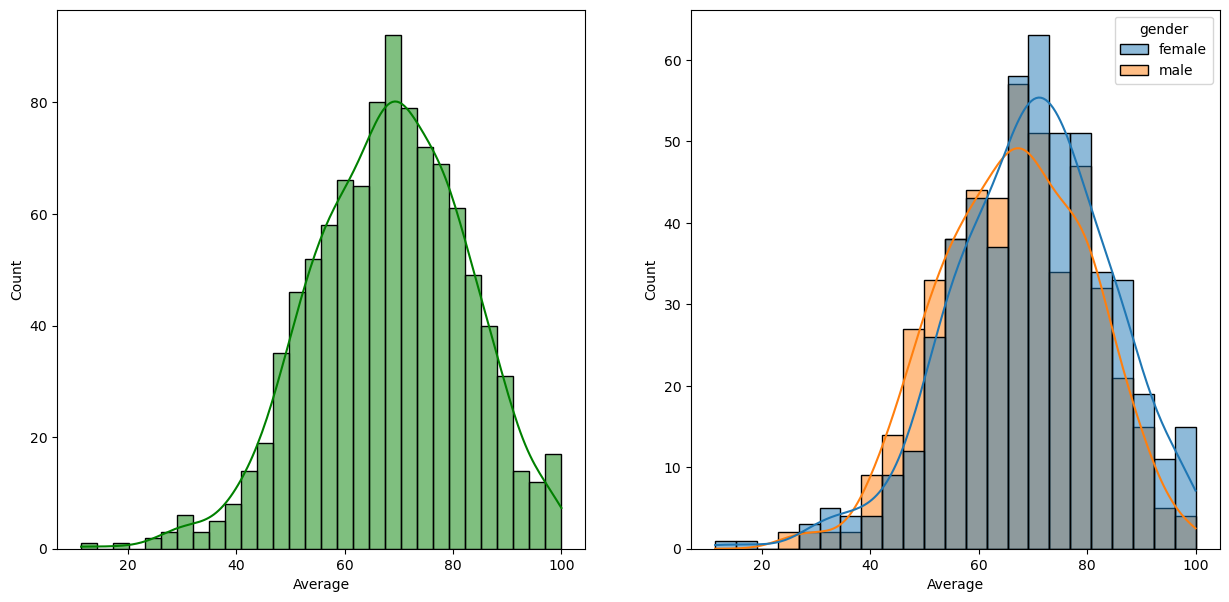

In [54]:
fig, axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

<AxesSubplot:title={'center':'Male'}, xlabel='Average', ylabel='Count'>

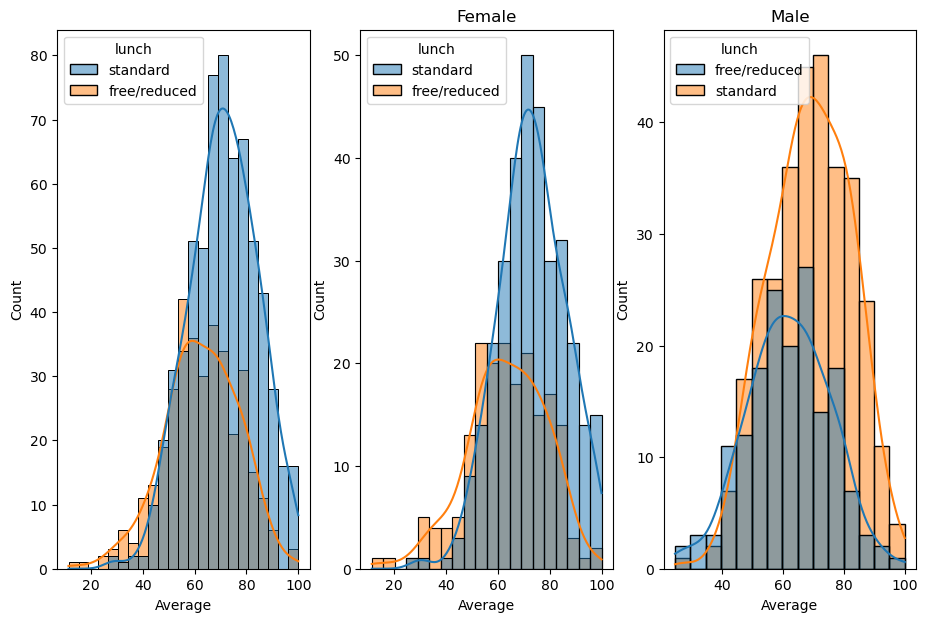

In [59]:
plt.subplots(1,3, figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df, x='Average',kde=True,hue='lunch')
plt.subplot(142)
plt.title("Female")
sns.histplot(data=df[df.gender=="female"], x='Average', kde=True,hue='lunch')
plt.subplot(143)
plt.title("Male")
sns.histplot(data=df[df.gender=="male"], x='Average', kde=True,hue='lunch')

## *4.2 Checking outliers*

In [60]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,216,72.000000
1,female,group C,some college,standard,completed,69,90,88,249,83.000000
2,female,group B,master's degree,standard,none,90,95,93,280,93.333333
3,male,group A,associate's degree,free/reduced,none,47,57,44,161,53.666667
4,male,group C,some college,standard,none,76,78,75,232,77.333333


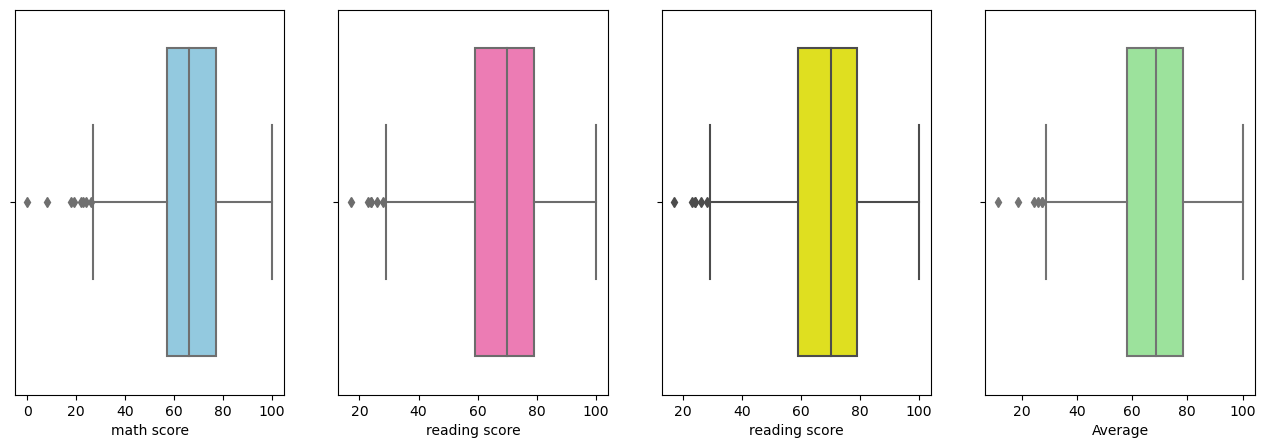

In [61]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['reading score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()